<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Exercise-Recommender/Random_Forest_Final_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the  exercise dataset
data = pd.read_csv('/content/Encoded_Exercise_Dataset.csv')

In [ ]:
# Showing the first 5 rows of the data set
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise,BMIcase_encoded
0,92.085190,1.760250,29.719488,59,over weight,5,Cycling Machine; Leg Press Machine; Seated Row...,Jumping Jacks; Seated Leg Raises; Low-Impact S...,4
1,61.089124,1.595499,23.997776,25,normal,4,Treadmill (Incline Walk/Run); Leg Press Machin...,Jump Rope; Mountain Climbers; Bodyweight Squats,2
2,82.454037,1.816538,24.987499,50,normal,4,Treadmill (Incline Walk/Run); Leg Press Machin...,Jump Rope; Mountain Climbers; Bodyweight Squats,2
3,101.713306,1.790696,31.720047,62,obese,6,Elliptical Machine; Cable Rows; Leg Curl Machine,Seated Marching (Low Impact); Chair Squats; St...,3
4,62.347337,1.543259,26.178219,35,over weight,5,Cycling Machine; Leg Press Machine; Seated Row...,Jumping Jacks; Seated Leg Raises; Low-Impact S...,4


In [ ]:

# Indentify each numerical data range
data.describe().loc[['min','max']]

,Weight,Height,BMI,Age,Exercise Intensity,BMIcase_encoded
min,50.002978,1.390171,15.106978,18.0,1.0,0.0
max,109.998871,1.829867,34.997098,65.0,7.0,6.0


In [ ]:
# Identifing the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
 8   BMIcase_encoded     2492 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 175.3+ KB


In [ ]:
# Value counts in each categorical data

# Making a dictionary for store categorical data
value_counts_dict = {}

# Value count each categorical data by looping and save it in a dictionary

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        value_counts_dict[col] = data[col].value_counts()

# Print each categorical data by looping

for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column '{col}':\n{value_counts}\n")

Value counts for column 'BMIcase':
BMIcase
severe obese         784
over weight          575
normal               550
obese                483
mild thinness         60
moderate thinness     27
sever thinness        13
Name: count, dtype: int64

Value counts for column 'Gym Exercise':
Gym Exercise
Swimming / Aqua Aerobics; Seated Elliptical Machine; Leg Extension Machine    784
Cycling Machine; Leg Press Machine; Seated Row Machine                        575
Treadmill (Incline Walk/Run); Leg Press Machine; Lat Pulldown Machine         550
Elliptical Machine; Cable Rows; Leg Curl Machine                              483
Squat with Dumbbells; Leg Curl Machine; Shoulder Press Machine                 60
Deadlifts (Light Weight); Cable Chest Flys; Seated Row Machine                 27
Light Weight Training (Squats, Deadlifts); Yoga or Pilates ; Light Cycling     13
Name: count, dtype: int64

Value counts for column 'Home Exercise':
Home Exercise
Seated Leg Lifts; Wall Push-ups; Side Leg Rais

In [ ]:
# Print each unique categorical data

unique_dict = {}

 # Search for unique categorical data by looping and save it in a dictionary

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        unique_dict[col] = data[col].unique()

# Print each unique categorical data by looping

for col, unique in unique_dict.items():
    print(f"'{col}' unique:\n{unique}\n")

'BMIcase' unique:
['over weight' 'normal' 'obese' 'severe obese' 'mild thinness'
 'moderate thinness' 'sever thinness']

'Gym Exercise' unique:
['Cycling Machine; Leg Press Machine; Seated Row Machine'
 'Treadmill (Incline Walk/Run); Leg Press Machine; Lat Pulldown Machine'
 'Elliptical Machine; Cable Rows; Leg Curl Machine'
 'Swimming / Aqua Aerobics; Seated Elliptical Machine; Leg Extension Machine'
 'Squat with Dumbbells; Leg Curl Machine; Shoulder Press Machine'
 'Deadlifts (Light Weight); Cable Chest Flys; Seated Row Machine'
 'Light Weight Training (Squats, Deadlifts); Yoga or Pilates ; Light Cycling']

'Home Exercise' unique:
['Jumping Jacks; Seated Leg Raises; Low-Impact Step-ups'
 'Jump Rope; Mountain Climbers; Bodyweight Squats'
 'Seated Marching (Low Impact); Chair Squats; Standing Arm Circles'
 'Seated Leg Lifts; Wall Push-ups; Side Leg Raises'
 'Step-ups on Chair; Wall Sit Hold; Dumbbell Bent-over Rows'
 'Lunges; Plank to Push-up; Resistance Band Rows'
 'Bodyweight Squats;

In [ ]:
# Encode 'BMIcase' into numerical values

label_encoder = LabelEncoder()
data['BMIcase_encoded'] = label_encoder.fit_transform(data['BMIcase'])

In [ ]:
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise,BMIcase_encoded
0,92.085190,1.760250,29.719488,59,over weight,5,Cycling Machine; Leg Press Machine; Seated Row...,Jumping Jacks; Seated Leg Raises; Low-Impact S...,4
1,61.089124,1.595499,23.997776,25,normal,4,Treadmill (Incline Walk/Run); Leg Press Machin...,Jump Rope; Mountain Climbers; Bodyweight Squats,2
2,82.454037,1.816538,24.987499,50,normal,4,Treadmill (Incline Walk/Run); Leg Press Machin...,Jump Rope; Mountain Climbers; Bodyweight Squats,2
3,101.713306,1.790696,31.720047,62,obese,6,Elliptical Machine; Cable Rows; Leg Curl Machine,Seated Marching (Low Impact); Chair Squats; St...,3
4,62.347337,1.543259,26.178219,35,over weight,5,Cycling Machine; Leg Press Machine; Seated Row...,Jumping Jacks; Seated Leg Raises; Low-Impact S...,4


In [ ]:
# Save the modified dataset with the encoded BMIcase column
data.to_csv('Encoded_Exercise_Dataset.csv', index=False)

# Verify the file is saved
print("Encoded dataset has been saved successfully!")


Encoded dataset has been saved successfully!


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
 8   BMIcase_encoded     2492 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 175.3+ KB


In [ ]:
# Define features (X) and target (y)
X = data[['Weight', 'Height', 'BMI', 'Age']]
y = data['BMIcase_encoded']

In [ ]:
X.head()

,Weight,Height,BMI,Age
0,92.085190,1.760250,29.719488,59
1,61.089124,1.595499,23.997776,25
2,82.454037,1.816538,24.987499,50
3,101.713306,1.790696,31.720047,62
4,62.347337,1.543259,26.178219,35


In [ ]:
y.head()

,BMIcase_encoded
0,4
1,2
2,2
3,3
4,4


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1993, 4)

In [ ]:
X_test.shape

(499, 4)

Target in y_train is imbalanced

Class 6: 636 counts, Proportion = 31.91%
Class 4: 463 counts, Proportion = 23.23%
Class 2: 436 counts, Proportion = 21.88%
Class 3: 382 counts, Proportion = 19.17%
Class 0: 45 counts, Proportion = 2.26%
Class 1: 22 counts, Proportion = 1.1%
Class 5: 9 counts, Proportion = 0.45%


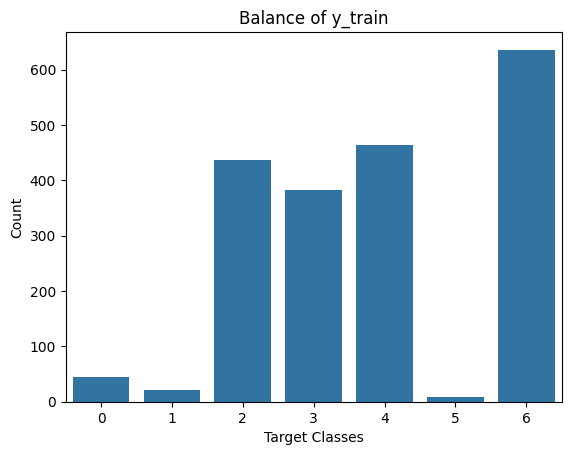

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating probability for y_train
p_class = y_train.value_counts() / len(y_train)

# Check for balance
if max(p_class) - min(p_class) <= 0.05:
    print(f'Target in y_train is balanced\n')
else:
    print(f'Target in y_train is imbalanced\n')

# Print class details
for target_class, proportion in p_class.items():
    print(f"Class {target_class}: {y_train.value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

# Visualize the balance of y_train
sns.countplot(x=y_train)
plt.title("Balance of y_train")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Apply SMOTE only on the training set

sm = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train, y_train)

# Checking the class distribution after SMOTE for the training set
print("Class distribution in Y_train after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())




Class distribution in Y_train after SMOTE:
BMIcase_encoded
4    636
2    636
6    636
3    636
0    636
1    636
5    636
Name: count, dtype: int64


Target in Y_train_resampled is balanced

Class 4: 636 counts, Proportion = 14.29%
Class 2: 636 counts, Proportion = 14.29%
Class 6: 636 counts, Proportion = 14.29%
Class 3: 636 counts, Proportion = 14.29%
Class 0: 636 counts, Proportion = 14.29%
Class 1: 636 counts, Proportion = 14.29%
Class 5: 636 counts, Proportion = 14.29%


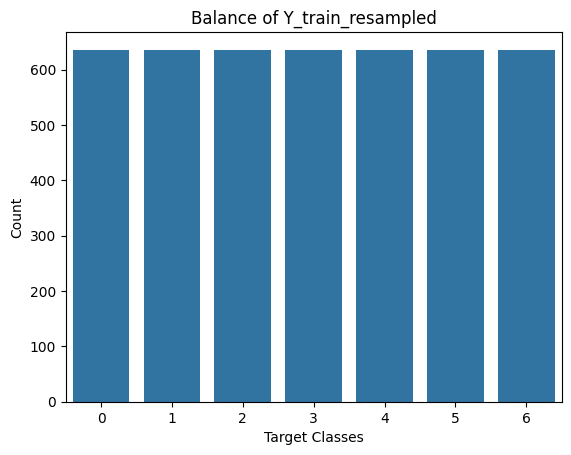

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the class distribution after SMOTE
p_class = pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled)

if max(p_class) - min(p_class) <= 0.05:
    print(f'Target in Y_train_resampled is balanced\n')
else:
    print(f'Target in Y_train_resampled is imbalanced\n')

# Print class details
for target_class, proportion in p_class.items():
    print(f"Class {target_class}: {pd.Series(Y_train_resampled).value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

# Visualize the balance of Y_train_resampled
sns.countplot(x=pd.Series(Y_train_resampled))
plt.title("Balance of Y_train_resampled")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
random_forest = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    n_estimators=100
)

random_forest.fit(X_train_resampled, Y_train_resampled)




RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [ ]:
# Making the predictions on the test set
y_pred = random_forest.predict(X_test)

# Training accuracy on the resampled training set
train_accuracy = random_forest.score(X_train_resampled, Y_train_resampled)
print("Training Accuracy on Resampled Data: ", train_accuracy)

# Test accuracy
test_accuracy = random_forest.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Accuracy on Resampled Data:  0.9362084456424079
Test Accuracy:  0.7915831663326653
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       0.96      1.00      0.98       114
           3       0.68      0.62      0.65       101
           4       0.82      0.93      0.87       112
           5       1.00      1.00      1.00         4
           6       0.66      0.61      0.63       148

    accuracy                           0.79       499
   macro avg       0.87      0.88      0.88       499
weighted avg       0.78      0.79      0.79       499

Confusion Matrix:
 [[ 15   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0]
 [  0   0 114   0   0   0   0]
 [  0   0   0  63   0   0  38]
 [  0   0   0   0 104   0   8]
 [  0   0   0   0   0   4   0]
 [  0   0   5  30  23   0  90]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [8, 10],
    'min_samples_split': [30, 35],
    'min_samples_leaf': [20, 25],
    'max_features': ['log2'],
    'criterion': ['gini'],
    'class_weight': ['balanced'],
    'bootstrap': [True]
}

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, n_iter=20,
    scoring='accuracy', cv=cv, verbose=2, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters and train model
best_params = random_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate model
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Training Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)
print("Classification Report:")
print(classification_report(y_test, best_rf.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_rf.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Training Accuracy:  0.8379327646763672
Test Accuracy:  0.7915831663326653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89         5
           2       0.96      1.00      0.98       114
           3       0.66      0.62      0.64       101
           4       0.82      0.96      0.89       112
           5       0.80      1.00      0.89         4
           6       0.67      0.59      0.63       148

    accuracy                           0.79       499
   macro avg       0.84      0.85      0.84       499
weighted avg       0.78      0.79      0.78       499

Confusion Matrix:
[[ 15   0   0   0   0   0 

In [ ]:
import numpy as np

def test_trained_rf_model(weight, height, age, label_encoder, best_model, data):
    # Calculate BMI
    bmi = weight / (height ** 2)

    # BMI case classification
    if bmi < 16:
        bmi_case = 'severe thinness'
    elif 16 <= bmi < 17:
        bmi_case = 'moderate thinness'
    elif 17 <= bmi < 18.5:
        bmi_case = 'mild thinness'
    elif 18.5 <= bmi < 24.9:
        bmi_case = 'normal'
    elif 25 <= bmi < 29.9:
        bmi_case = 'over weight'
    elif 30 <= bmi < 34.9:
        bmi_case = 'obese'
    else:
        bmi_case = 'severe obese'

    # Encode BMI case
    bmi_case_encoded = label_encoder.transform([bmi_case])[0]

    # Prepare input features for the model
    input_features = np.array([[weight, height, bmi, age]])

    # Predict BMI case using the trained Random Forest model
    predicted_intensity = best_rf.predict(input_features)[0]

    # Get exercise recommendations based on the predicted BMI case
    gym_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Gym Exercise'].iloc[0]
    home_exercise = data.loc[data['BMIcase_encoded'] == predicted_intensity, 'Home Exercise'].iloc[0]

    return predicted_intensity, gym_exercise, home_exercise, bmi_case

# Example user input
predicted_intensity, gym_exercise, home_exercise, bmi_case = test_trained_rf_model(
    weight=72, height=1.6, age=22,
    label_encoder=label_encoder, best_model=best_rf, data=data
)

print(f"Predicted BMI Case (Encoded): {predicted_intensity}\n")
print(f"BMI Case: {bmi_case}\n")
print(f"Recommended Gym Exercise: {gym_exercise}\n")
print(f"Recommended Home Exercise: {home_exercise}\n")


Predicted BMI Case (Encoded): 4

BMI Case: over weight

Recommended Gym Exercise: Cycling Machine; Leg Press Machine; Seated Row Machine

Recommended Home Exercise: Jumping Jacks; Seated Leg Raises; Low-Impact Step-ups



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(best_rf, 'Random_forest_model.pkl')

print("Model has been saved successfully!")


Model has been saved successfully!
